# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
  * [Imports](#Imports)
  * [Objectives](#Objectives)
  * [Data Dictionary](#Data_Dictionary)
  * [Load The Credit Card Customer Attrition Prediction Data](#Load_The_CC_Attrition_Data)
      * [Categorical Features](#Categorical_Features)
      * [Numeric Features](#Numeric_Features)
      * [Feature Scaling](#Feature_Scaling)
  * [Save data](#Save_data)
  * [Target Feature](#Target_Feature)
  * [Summary](#Summary)


## Introduction<a id='Introduction'></a>

Identify and visualize which factors contribute to customer churn:The customer churn, also known as customer attrition, refers a customer ending relationship with bank for some reasons.

Build a prediction model that will perform the following:
Classify if a customer is leaving or not.
customer service team can contact customers on the list to better understand their needs or propose new offers or different products and do necessary steps from churning.


### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate it if one could predict for them who will get churned so they can proactively improve the service, so that the bank can run profitably.Because it is well known that getting new customer is more costlier than retaining customer.

Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.


## Imports<a id='Imports'></a>

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## Objectives<a id='Objectives'></a>

* Explore the dataset and visualize the same
* Build a model to predict the customer is going to churn or not
* Optimize the model with appropriate techniques 
* Generate a set of insights and recommendations that may help the bank

## Data Dictionary<a id='Data Dictionary'></a>

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the customer
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification -Graduate, High School, Unknown, Uneducated, College, Post-Graduate, Doctorate.
* Marital_Status: Marital Status
* Income_Category: Annual Income Category 
* Card_Category: Type of Card
* Months_on_book: Time frame with the Bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months(one year)
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months(one year)
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount in Last 12 months((one year))
* Total_Trans_Ct: Total Transaction Count in Last 12 months((one year))
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Load The Credit Card Customer Attrition Prediction Data<a id='Load_The_CC_Attrition_Data'></a>

In [2]:
ccattr_data = pd.read_csv('../Data/BankChurners.csv',header=0)

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
# see a summary of the data
ccattr_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


The last 2 columns appear to be predictions. Change their name to be more readable.

In [4]:
col1 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"
col2 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
ccattr_data.rename(columns={col1 : "naive_cls1", col2 : "naive_cls2"}, inplace=True)

In [5]:
#Check the data types of the columns
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are 10127 rows and 23 columns.
There are no missing values.

Most of the columns are numerical and 6 are categorical, and those are -
* Attrition_Flag
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category

In [6]:
ccattr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


* Average customer age is ~46 and min and max customer age is 70 to 82.
* Average period of relationship with the bank is ~36 months with minimum of 13 and max as 56.
* Average Total number of product with the customer ~4 and maximum is 6.
* Mean of Credit_limit 8631 while median is 4549 ,data may have outliers.
* Total_Revolving_Bal(unpaid portion) has mean as 1162 while median is 1276, No outliers.
* Avg_Open_To_Buy(amount left on the credit card) has mean 7469 and max as 34516.Appears some outliers.
* Total_Trans_Amt has an average of 4404 and median of 3899. This indicate outliers.

## Explore The Data<a id='Explore_The_Data'></a>

### Number Of Missing Values By Column<a id='Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [7]:
missing = pd.concat([ccattr_data.isnull().mean(), 100 * ccattr_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by= 'count', ascending=False)

,count,%
CLIENTNUM,0.0,0.0
Contacts_Count_12_mon,0.0,0.0
naive_cls1,0.0,0.0
Avg_Utilization_Ratio,0.0,0.0
Total_Ct_Chng_Q4_Q1,0.0,0.0
Total_Trans_Ct,0.0,0.0
Total_Trans_Amt,0.0,0.0
Total_Amt_Chng_Q4_Q1,0.0,0.0
Avg_Open_To_Buy,0.0,0.0
Total_Revolving_Bal,0.0,0.0


No missing values

### Categorical Features<a id='Categorical_Features'></a>

In [8]:
#Use ccattr_data's `select_dtypes` method to select columns of dtype 'object'
ccattr_data.select_dtypes(object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


Education level and Marital Status have unknown values.

Apart from above categorical features below  4 features may play role in churning rate.
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon 

These features will provide insights for churning rate with Attrition_Flag being target value. And need to explore more about these features.
* Gender 
* Education_Level 
* Marital_Status 
* Income_Category
* Card_Category
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon

**Unique_values**

In [9]:
# Checking for nunique value in the data attributes
ccattr_data.nunique().sort_values(ascending = False)

CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
naive_cls1                   1704
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
naive_cls2                    640
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Contacts_Count_12_mon           7
Education_Level                 7
Months_Inactive_12_mon          7
Total_Relationship_Count        6
Income_Category                 6
Dependent_count                 6
Card_Category                   4
Marital_Status                  4
Attrition_Flag                  2
Gender                          2
dtype: int64

 CLIENTNUM appears to be unique value.This also tells there are no duplicate values.

In [10]:
# get into more specfic , find the unique values for categorical data
cat_col = ccattr_data.select_dtypes(include = ['object'])
unique_values = cat_col.nunique(dropna=False)
print (unique_values)

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64


In [11]:
# get into more specfic , find the unique values for discrete data
cat_col = ccattr_data.select_dtypes(include = ['int64'])
unique_values = cat_col.nunique(dropna=False)
print (unique_values)

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Total_Revolving_Bal          1974
Total_Trans_Amt              5033
Total_Trans_Ct                126
dtype: int64


Unique values for float type is not necessary as they are income type.

**Find the unique values and their counts for these below features. These features may provide insights for churning rate with Attrition_Flag being target value**
* Attrition_Flag 
* Gender 
* Education_Level 
* Marital_Status 
* Income_Category
* Card_Category
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon


#unique values and their relative frequency for Attrition_Flag
pd.DataFrame({"Relative Frequency for Attrition_Flag": ccattr_data['Attrition_Flag'].value_counts(normalize=True)})

In [12]:
#unique values and their relative frequency for Gender
pd.DataFrame({"Relative Frequency for Gender": ccattr_data['Gender'].value_counts(normalize=True)})

,Relative Frequency for Gender
F,0.529081
M,0.470919


In [13]:
#unique values and their relative frequency for Education_Level
pd.DataFrame({"Relative Frequency for Education_Level": ccattr_data['Education_Level'].value_counts(normalize=True)})

,Relative Frequency for Education_Level
Graduate,0.308877
High School,0.198776
Unknown,0.149995
Uneducated,0.146835
College,0.100030
Post-Graduate,0.050953
Doctorate,0.044534


Education_Level has the value "Unknown". This needs to be treated.

In [14]:
#unique values and their relative frequency for Marital_Status
pd.DataFrame({"Relative Frequency for Marital_Status": ccattr_data['Marital_Status'].value_counts(normalize=True)})

,Relative Frequency for Marital_Status
Married,0.462822
Single,0.389355
Unknown,0.073961
Divorced,0.073862


Marital_Status has the value "Unknown". This needs to be treated.

In [15]:
# Clean the label, so it is more intutive
replace_values = {"$40K - $60K" : "40k − 60K","$60K - $80K":"60K - 80K","$80K - $120K" : "80K - 120K","$120K +":"120K+","Less than $40K":"40K - 0K"}
ccattr_data=ccattr_data.replace({"Income_Category" : replace_values})

In [16]:
pd.DataFrame({"Counts": ccattr_data['Income_Category'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
40K - 0K,3561
40k − 60K,1790
80K - 120K,1535
60K - 80K,1402
Unknown,1112
120K+,727


In [17]:
#unique values and their relative frequency for Income_Category
pd.DataFrame({"Relative Frequency for Income_Category": ccattr_data['Income_Category'].value_counts(normalize=True)})

,Relative Frequency for Income_Category
40K - 0K,0.351634
40k − 60K,0.176755
80K - 120K,0.151575
60K - 80K,0.138442
Unknown,0.109805
120K+,0.071788


Income_Category has the value "Unknown". This needs to be treated.

In [18]:
#unique values and their relative frequency for Card_Category
pd.DataFrame({"Relative Frequency for Card_Category": ccattr_data['Card_Category'].value_counts(normalize=True)})

,Relative Frequency for Card_Category
Blue,0.931767
Silver,0.054804
Gold,0.011455
Platinum,0.001975


In [19]:
#unique values and their relative frequency for Dependent_count
pd.DataFrame({"Relative Frequency for Dependent_count": ccattr_data['Dependent_count'].value_counts(normalize=True)})

,Relative Frequency for Dependent_count
3,0.269774
2,0.262170
1,0.181495
4,0.155426
0,0.089266
5,0.041868


In [20]:
#unique values and their relative frequency for Total_Relationship_Count
pd.DataFrame({"Relative Frequency for Total_Relationship_Count": ccattr_data['Total_Relationship_Count'].value_counts(normalize=True)})

,Relative Frequency for Total_Relationship_Count
3,0.227609
4,0.188802
5,0.186729
6,0.184260
2,0.122741
1,0.089859


In [21]:
#unique values and their relative frequency for Months_Inactive_12_mon
pd.DataFrame({"Relative Frequency for Months_Inactive_12_mon": ccattr_data['Months_Inactive_12_mon'].value_counts(normalize=True)})

,Relative Frequency for Months_Inactive_12_mon
3,0.379777
2,0.324084
1,0.220500
4,0.042954
5,0.017577
6,0.012244
0,0.002864


In [22]:
#unique values and their relative frequency for Contacts_Count_12_mon
pd.DataFrame({"Relative Frequency for Contacts_Count_12_mon": ccattr_data['Months_Inactive_12_mon'].value_counts(normalize=True)})

,Relative Frequency for Contacts_Count_12_mon
3,0.379777
2,0.324084
1,0.220500
4,0.042954
5,0.017577
6,0.012244
0,0.002864


###### A casual inspection by eye reveals following
* Total of 16% customers has attrited against 84% are still with bank.
* Bank has both Male and Female are almost same number.
* More customer are with education "Graduate", followed with "unknown", with "Uneducated" and "College".
* Most of them are married or single.
* Less than 40K income customer are more.
* Customer with 2 or 3 dependednt top the list.Maximum dependency is 5.
* Blue card has more customers.
* Maximum 6 product are held by customer, people with 3 products tops the list.Followed with 4 and 5.
* Customer are in contact with Bank for 0 times are at the least, followed with 6 times.Customer with 2 and 3 times contacted by Bank are toping the list.
* More customer stayed inactive for 2-3 months.
* Education level,Income category,martial status has "Unknown" category , this will have to be treated as missing value and will have to be imputed.



**Fix "Unknown" for 'Education_Level', 'Marital_Status', 'Income_Category' according to the respective mode**

In [23]:
# Clean the label, so it is more intutive
replace_values = {"$40K - $60K" : "40k − 60K","$60K - $80K":"60K - 80K","$80K - $120K" : "80K - 120K","$120K +":"120K+","Less than $40K":"40K - 0K"}
ccattr_data=ccattr_data.replace({"Income_Category" : replace_values})

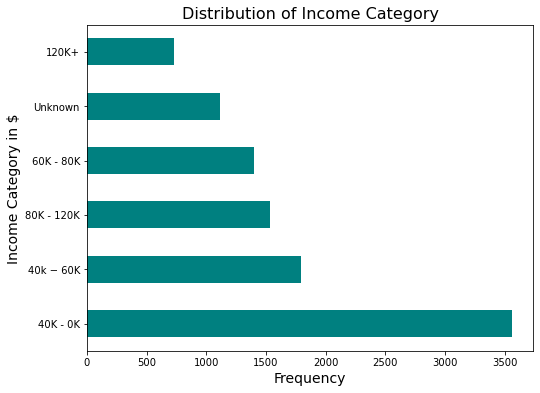

In [24]:
ccattr_data["Income_Category"].value_counts().plot(kind='barh',figsize =(8,6),color = "teal")
_=plt.xlabel("Frequency",fontsize=14)
_=plt.ylabel("Income Category in $",fontsize=14)
_=plt.title('Distribution of Income Category',fontsize=16)

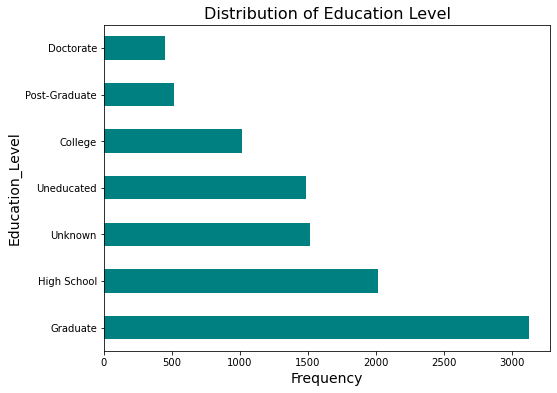

In [25]:
ccattr_data["Education_Level"].value_counts().plot(kind='barh',figsize =(8,6),color = "teal")
_=plt.xlabel("Frequency",fontsize=14)
_=plt.ylabel("Education_Level",fontsize=14)
_=plt.title('Distribution of Education Level',fontsize=16)

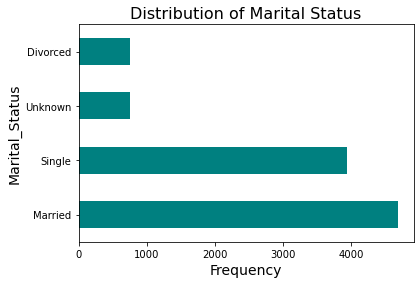

In [26]:
ccattr_data["Marital_Status"].value_counts().plot(kind='barh',figsize =(6,4),color = "teal")
_=plt.xlabel("Frequency",fontsize=14)
_=plt.ylabel("Marital_Status",fontsize=14)
_=plt.title('Distribution of Marital Status',fontsize=16)

**Check for "Unknown" values with 'Education_Level', 'Marital_Status', 'Income_Category'**

In [27]:
col = ccattr_data['Income_Category']
mode = col.mode()[0]
ccattr_data.loc[ccattr_data['Income_Category'] == 'Unknown', 'Income_Category'] = mode

col = ccattr_data['Education_Level']
mode = col.mode()[0]
ccattr_data.loc[ccattr_data['Education_Level'] == 'Unknown', 'Education_Level'] = mode

col = ccattr_data['Marital_Status']
mode = col.mode()[0]
ccattr_data.loc[ccattr_data['Marital_Status'] == 'Unknown', 'Marital_Status'] = mode

In [28]:
CCAttr_cols = ['Education_Level', 'Marital_Status', 'Income_Category']
for col in CCAttr_cols:
    print("-"*25)
    print(f"Feature: {col}")
    print("-"*25)
    print(pd.DataFrame({"Counts": ccattr_data[col].value_counts(dropna=False)}).
          sort_values(by='Counts', ascending=False))
    print("-"*25)

-------------------------
Feature: Education_Level
-------------------------
               Counts
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
-------------------------
-------------------------
Feature: Marital_Status
-------------------------
          Counts
Married     5436
Single      3943
Divorced     748
-------------------------
-------------------------
Feature: Income_Category
-------------------------
            Counts
40K - 0K      4673
40k − 60K     1790
80K - 120K    1535
60K - 80K     1402
120K+          727
-------------------------


All looks good, there is No "Unknown" values.

### Numeric Features<a id='Numeric_Features'></a>

In [29]:
#Call sccattr_data's `describe` method for a statistical summary of the numerical columns
ccattr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


Since there is no missing values, these data appears to be good and valid.

Below feature may provide more insights on Attrition rate. Find their Unique Values and  Relative Frequency
* Months_on_book - Time frame with the Bank
* Credit_Limit - Credit Limit on the Credit Card
* Total_Revolving_Bal - The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy - Open to Buy refers to the amount left on the credit card to use 
* Total_Trans_Ct - Total Transaction Count in Last 12 months
* Avg_Utilization_Ratio -  Represents how much of the available credit the customer spent

### Feature Scaling and Distribution<a id='Feature_Scaling'></a>

Change "Existing customer" to 0 and "Attrited Customer" to 1 and add to new column 'Attrition_Numeric'.

In [30]:
ccattr_data['Attrition_Numeric'] = ccattr_data['Attrition_Flag'].map({'Existing Customer':0,"Attrited Customer":1})

In [31]:
ccattr_data.shape

(10127, 24)

Z-Score Scaling - number of standard deviations away from the mean

Formula for Z-score = (Observations - Mean)/Standard Deviation

In [32]:
def calczScore(col_name):
    col_mean = ccattr_data[col_name].mean()
    col_std = ccattr_data[col_name].std(ddof=0)
    new_col_name = col_name + "_zScore"
    ccattr_data[new_col_name] = (ccattr_data[col_name]-col_mean)/col_std

In [33]:
zScoreCol={"Customer_Age","Months_on_book","Total_Trans_Amt","Total_Trans_Ct","Months_Inactive_12_mon","Contacts_Count_12_mon"}

for col in zScoreCol:
    calczScore(col)

In [34]:
ccattr_data[["Customer_Age_zScore","Months_on_book_zScore","Total_Trans_Amt_zScore","Total_Trans_Ct_zScore",
             "Months_Inactive_12_mon_zScore","Contacts_Count_12_mon_zScore"]].head()

,Customer_Age_zScore,Months_on_book_zScore,Total_Trans_Amt_zScore,Total_Trans_Ct_zScore,Months_Inactive_12_mon_zScore,Contacts_Count_12_mon_zScore
0,-0.165406,0.384621,-0.959707,-0.973895,-1.327136,0.492404
1,0.333570,1.010715,-0.916433,-1.357340,-1.327136,-0.411616
2,0.583058,0.008965,-0.740982,-1.911206,-1.327136,-2.219655
3,-0.789126,-0.241473,-0.951758,-1.911206,1.641478,-1.315636
4,-0.789126,-1.869317,-1.056263,-1.570365,-1.327136,-2.219655


In [35]:
ccattr_data.shape

(10127, 30)

**Detecting Outliers using z-score with threshold value 3**

In [36]:
def outlier_inspect(df, col):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle("Distribution of " + col, fontsize=20)
    fig = sns.set_theme(style="ticks")
    ax = sns.histplot(x=df[col], kde=False, bins = 50,color="olive")
    ax.set_xlabel(col,fontsize=16);
    ax.set_ylabel("Count",fontsize=16);
    plt.show()

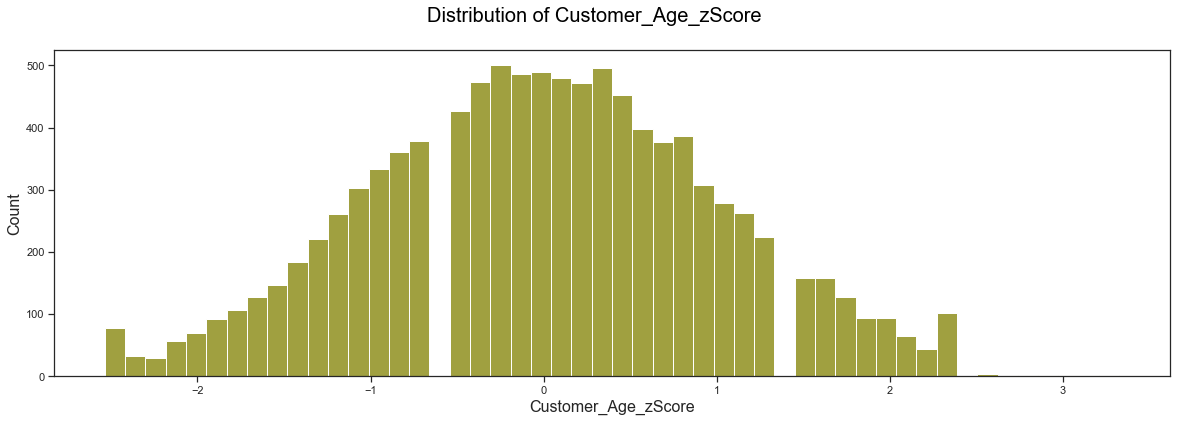

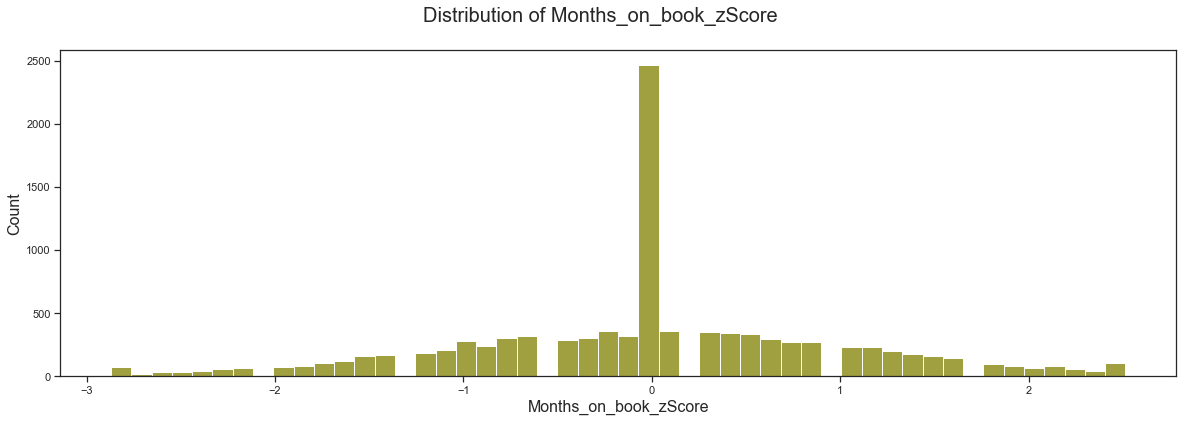

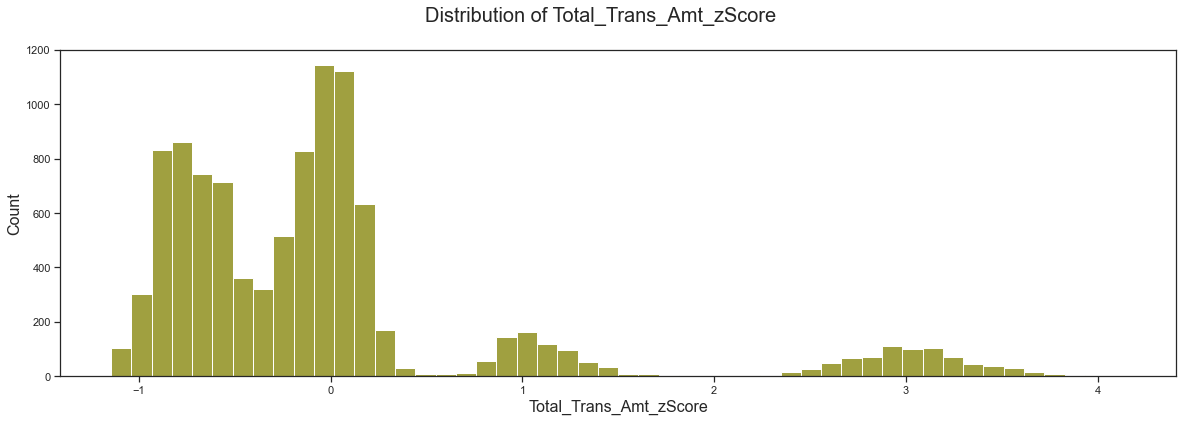

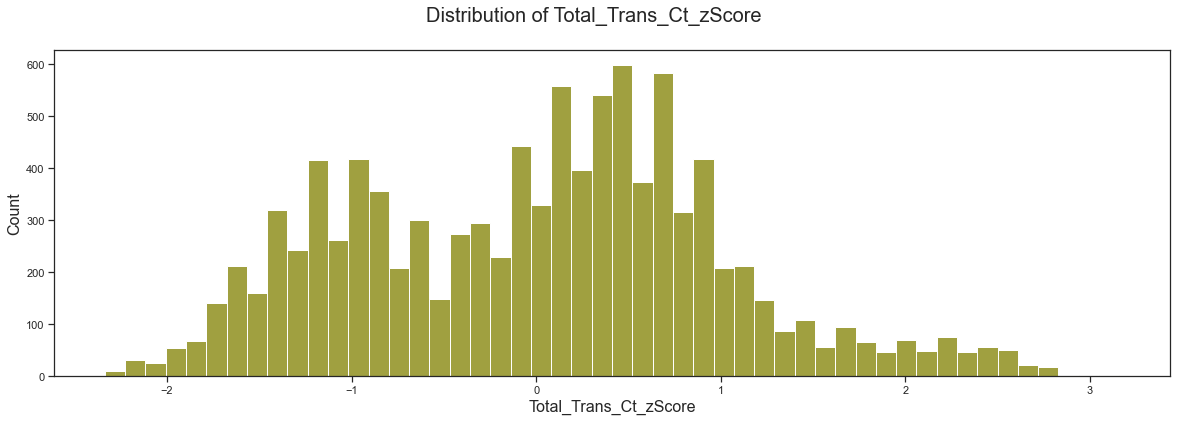

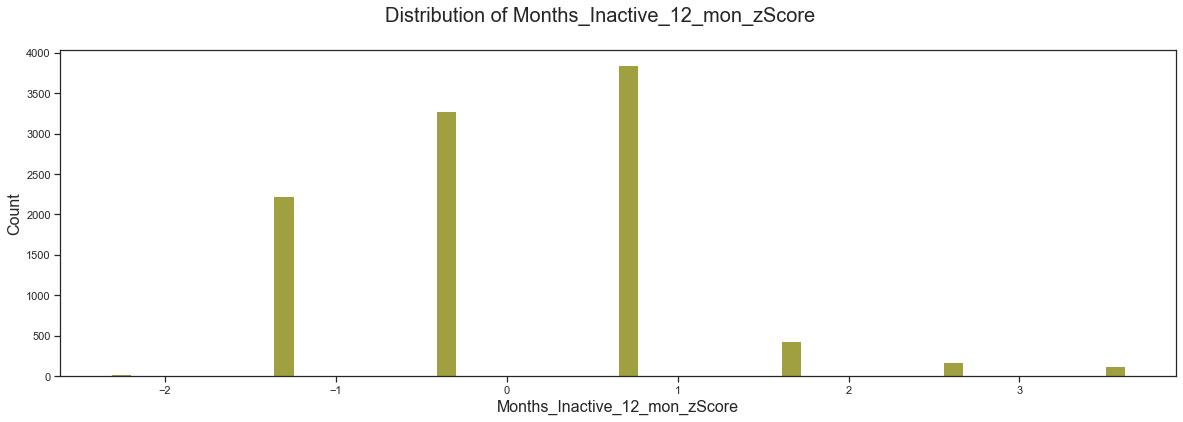

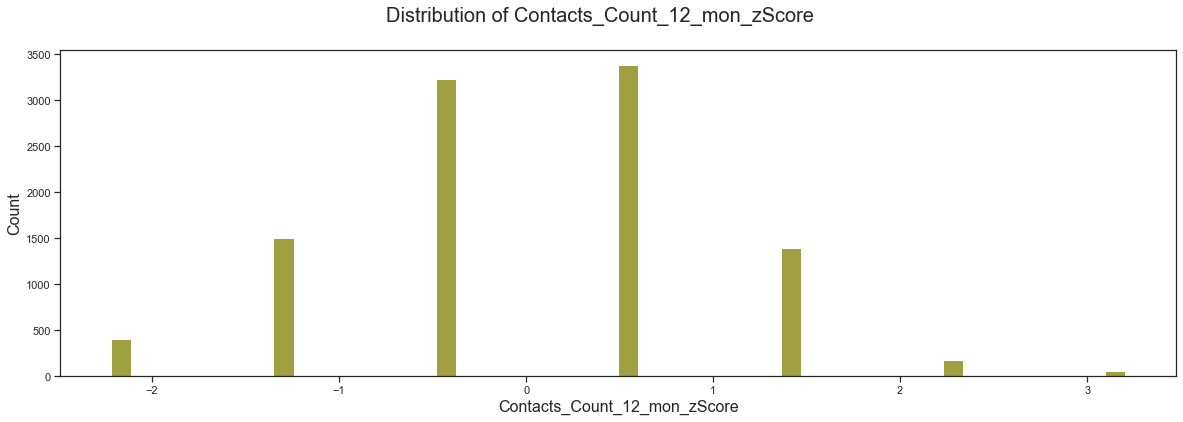

In [37]:
list_col=  ["Customer_Age_zScore","Months_on_book_zScore","Total_Trans_Amt_zScore","Total_Trans_Ct_zScore",
             "Months_Inactive_12_mon_zScore","Contacts_Count_12_mon_zScore"]
for col in list_col:
      outlier_inspect(ccattr_data,col)

* Customer Age appears to be normally distributed. May have negligible outliers or it should be good to train the model with these outliers.
* Months on book : Has the spike in the middle for 0 value.
* Total_Trans_Amt : This is interesting, with left skwed and bimodal, also with outliers.
* Total_Trans_Ct : Appears to be bimodal, may have outliers.
* Months_Inactive : Appears as left skwed. May have outliers
* Contacts_Count_12_mon : Distributed normally.

In [38]:
ccattr_data[ccattr_data["Months_on_book_zScore"]>3]["Months_on_book_zScore"].count()

0

In [39]:
ccattr_data[ccattr_data["Customer_Age_zScore"]>3]["Customer_Age_zScore"].count()

1

In [40]:
ccattr_data[ccattr_data["Total_Trans_Amt_zScore"]>3]["Total_Trans_Amt_zScore"].count()

391

In [41]:
ccattr_data[ccattr_data["Total_Trans_Ct_zScore"]>3]["Total_Trans_Ct_zScore"].count()

2

In [42]:
ccattr_data[ccattr_data["Months_Inactive_12_mon_zScore"]>3]["Months_Inactive_12_mon_zScore"].count()

124

In [43]:
ccattr_data[ccattr_data["Contacts_Count_12_mon_zScore"]>3]["Contacts_Count_12_mon_zScore"].count()

54

There are 
* 391 outliers for Total_Trans_Amt (Total Transaction Amount in Last 12 months)
* 124 for Months_Inactive ( No. of months inactive in the last 12 months)
* 54 for Contacts_Count (No. of Contacts between the customer and bank in the last 12 months)
* 2 for Total_Trans_Ct (Total Transaction Count in Last 12 months)
* 1 for Customer_Age
* and none for Months_on_book (Time frame with the Bank)

**Median Scaling**

In [44]:
def calcMedian(col_name):
    col_median = ccattr_data[col_name].median()
    new_col_name = col_name + "_divMedian"
    ccattr_data[new_col_name] = ccattr_data[col_name]/col_median

In [45]:
medianCol={"Credit_Limit","Total_Trans_Amt","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Amt","Total_Ct_Chng_Q4_Q1","Total_Amt_Chng_Q4_Q1","Avg_Utilization_Ratio"}

for col in medianCol:
    calcMedian(col)

In [46]:
ccattr_data.shape

(10127, 37)

In [47]:
ccattr_data[['Total_Revolving_Bal_divMedian', 'Credit_Limit_divMedian','Total_Ct_Chng_Q4_Q1_divMedian', 'Total_Amt_Chng_Q4_Q1_divMedian',
       'Total_Trans_Amt_divMedian', 'Avg_Open_To_Buy_divMedian',
       'Avg_Utilization_Ratio_divMedian']].head()

,Total_Revolving_Bal_divMedian,Credit_Limit_divMedian,Total_Ct_Chng_Q4_Q1_divMedian,Total_Amt_Chng_Q4_Q1_divMedian,Total_Trans_Amt_divMedian,Avg_Open_To_Buy_divMedian,Avg_Utilization_Ratio_divMedian
0,0.608934,2.789844,2.314815,1.813859,0.293409,3.429476,0.346591
1,0.677116,1.814904,5.290598,2.093750,0.331111,2.127807,0.596591
2,0.000000,0.751374,3.323362,3.524457,0.483970,0.983880,0.000000
3,1.972571,0.728292,3.323362,1.908967,0.300333,0.229131,4.318182
4,0.000000,1.036711,3.561254,2.955163,0.209284,1.357513,0.000000


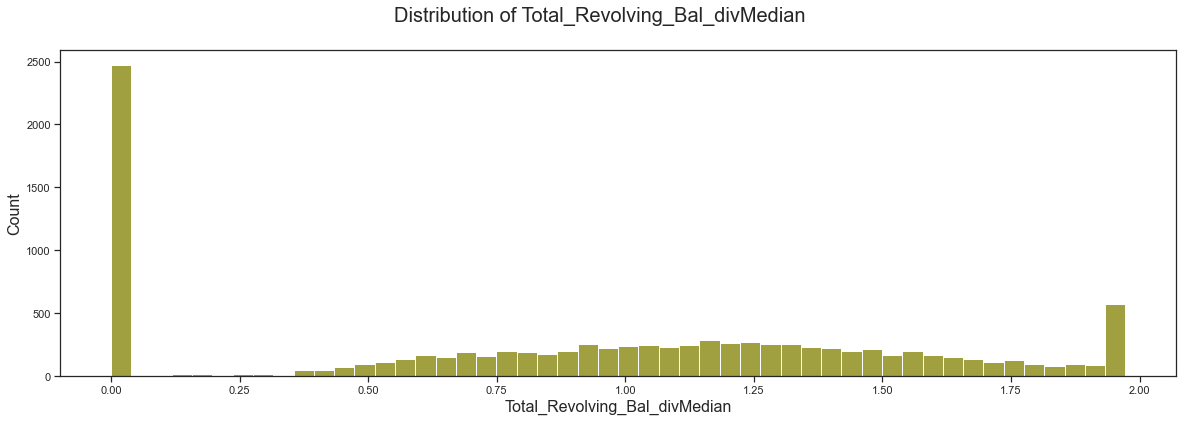

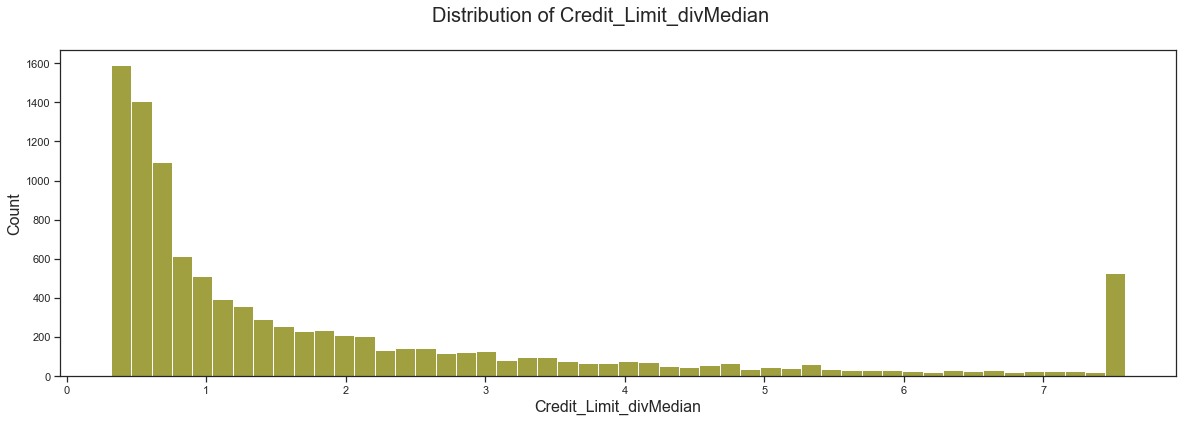

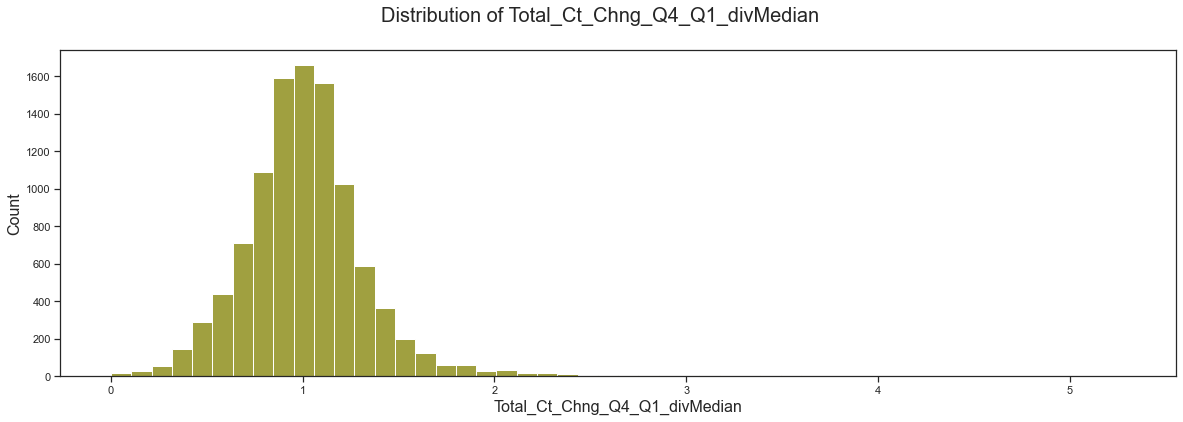

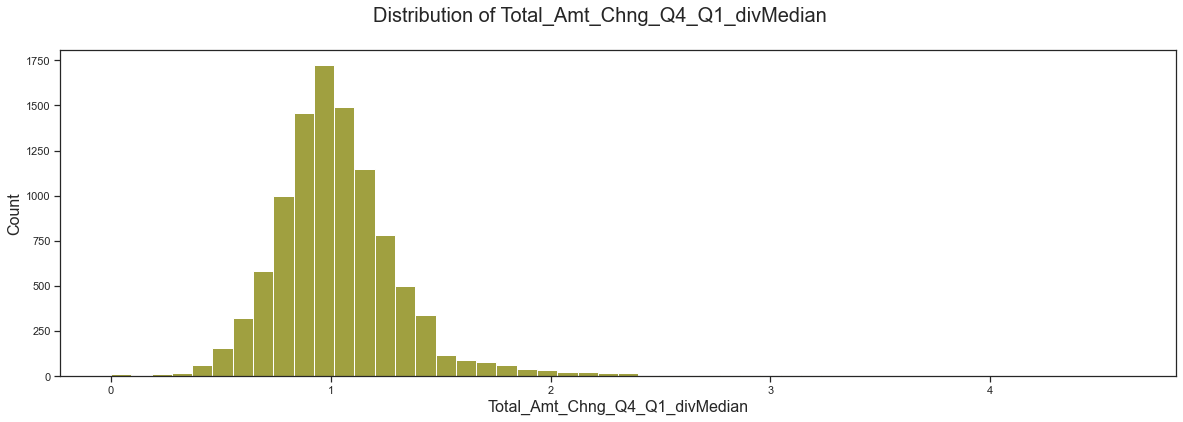

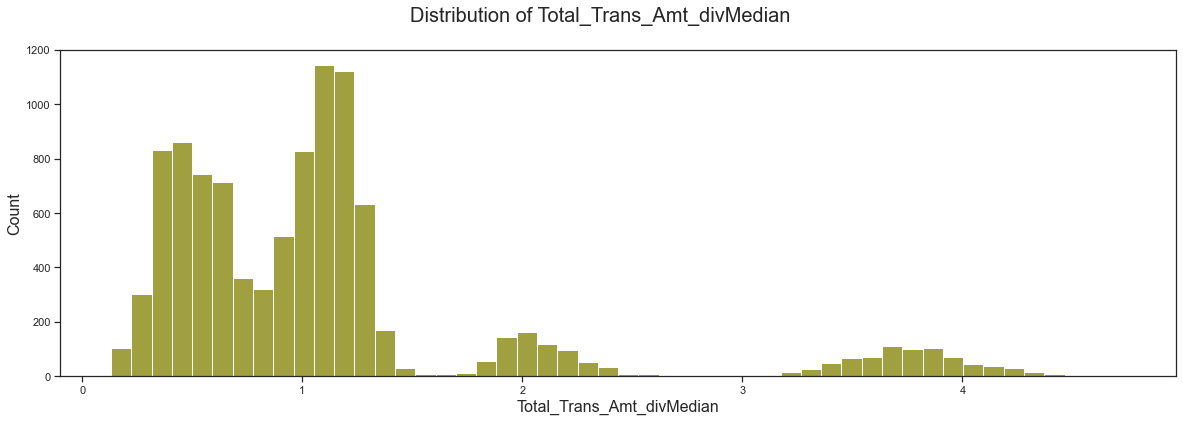

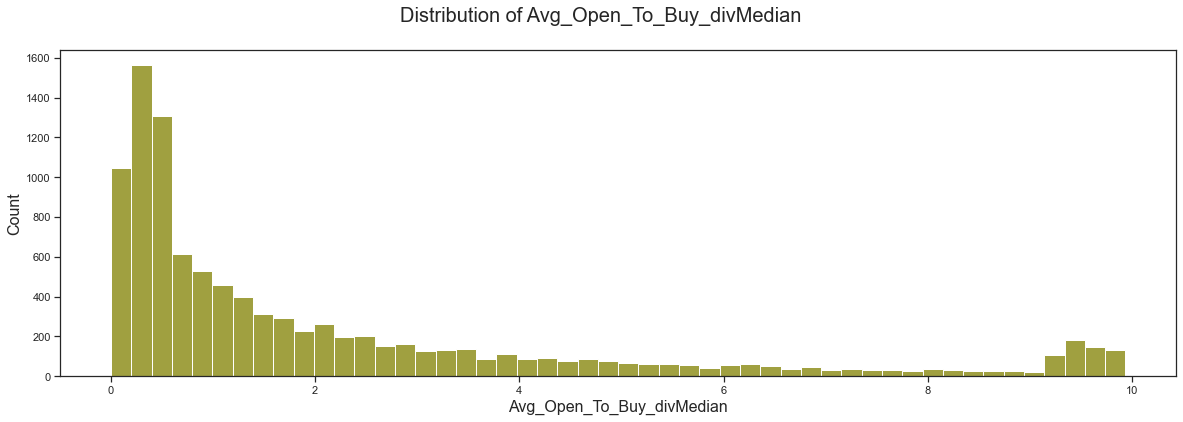

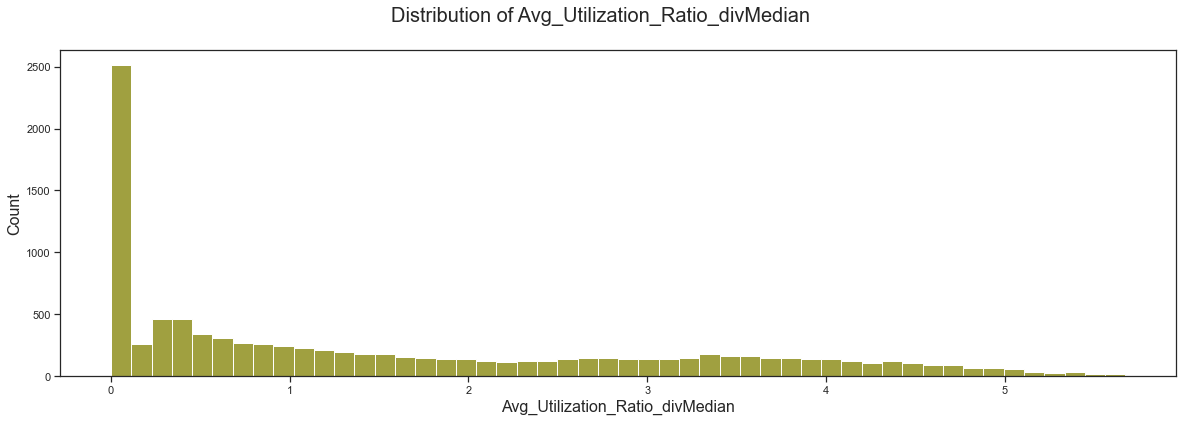

In [48]:
list_col=  ['Total_Revolving_Bal_divMedian', 'Credit_Limit_divMedian','Total_Ct_Chng_Q4_Q1_divMedian', 
            'Total_Amt_Chng_Q4_Q1_divMedian','Total_Trans_Amt_divMedian', 'Avg_Open_To_Buy_divMedian',
            'Avg_Utilization_Ratio_divMedian']
for col in list_col:
      outlier_inspect(ccattr_data,col)

In [ ]:
These features Skewed to left.
* Credit Limit -Credit Limit on the Credit Card
* Total_Trans_Amt -Total Transaction Amount in Last 12 months
* Total_Amt_Chng_Q4_Q1 - Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Trans_Amt - Very interesting, Left skwed, bimodal with outliers
* Avg_Open_To_Buy - The amount left on the credit card to use 

*Avg_Utilization_Ratio - has the spike at zero

In [49]:
log_col=  ["Credit_Limit","Avg_Open_To_Buy"]
for col in log_col:
    ccattr_data[col+"_log"] = np.log(ccattr_data[col])

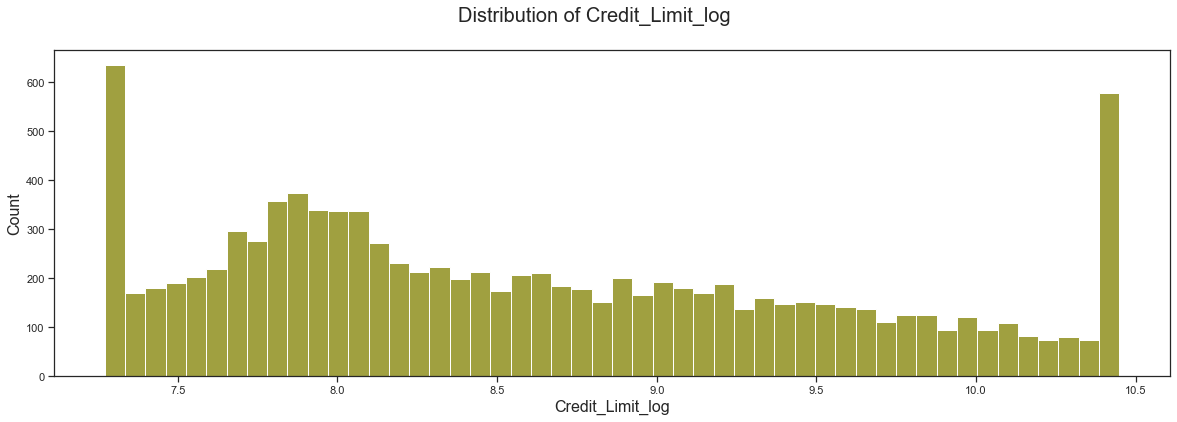

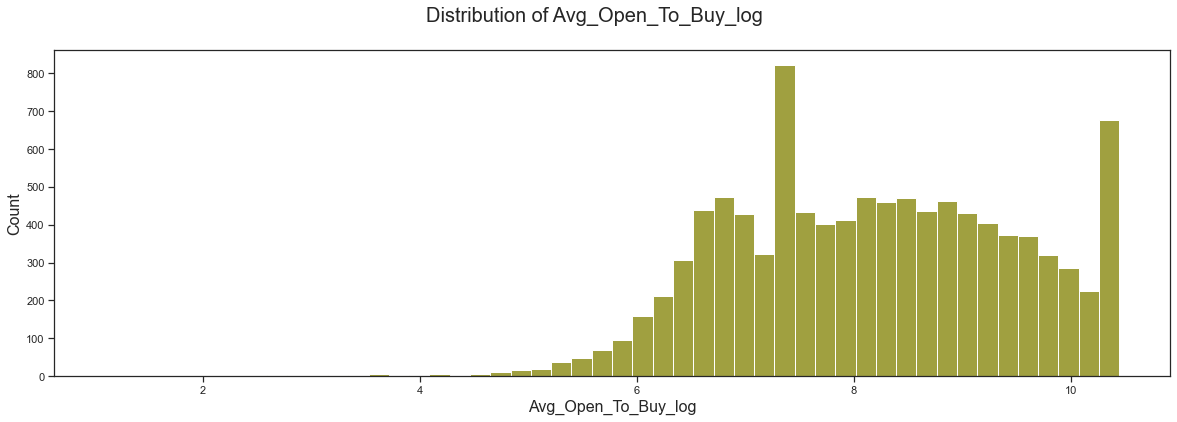

In [50]:
for col in log_col:
      outlier_inspect(ccattr_data,col+"_log")

* Credit_Limit: Credit Limit on the Credit Card - slightly left skewed, with spike on extremes.
* Avg_Open_To_Buy: The amount left on the credit card to use -  right skewed with outliers.    

In [51]:
ccattr_data.shape

(10127, 39)

In [52]:
ccattr_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon_zScore,Credit_Limit_divMedian,Total_Amt_Chng_Q4_Q1_divMedian,Total_Ct_Chng_Q4_Q1_divMedian,Total_Trans_Amt_divMedian,Avg_Utilization_Ratio_divMedian,Total_Revolving_Bal_divMedian,Avg_Open_To_Buy_divMedian,Credit_Limit_log,Avg_Open_To_Buy_log
0,768805383,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,...,0.492404,2.789844,1.813859,2.314815,0.293409,0.346591,0.608934,3.429476,9.448648,9.385469
1,818770008,Existing Customer,49,F,5,Graduate,Single,40K - 0K,Blue,44,...,-0.411616,1.814904,2.093750,5.290598,0.331111,0.596591,0.677116,2.127807,9.018695,8.908154
2,713982108,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,...,-2.219655,0.751374,3.524457,3.323362,0.483970,0.000000,0.000000,0.983880,8.136811,8.136811
3,769911858,Existing Customer,40,F,4,High School,Married,40K - 0K,Blue,34,...,-1.315636,0.728292,1.908967,3.323362,0.300333,4.318182,1.972571,0.229131,8.105609,6.679599
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,...,-2.219655,1.036711,2.955163,3.561254,0.209284,0.000000,0.000000,1.357513,8.458716,8.458716


Distribution for the remaining features:
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon
* Total_Ct_Chng_Q4_Q1

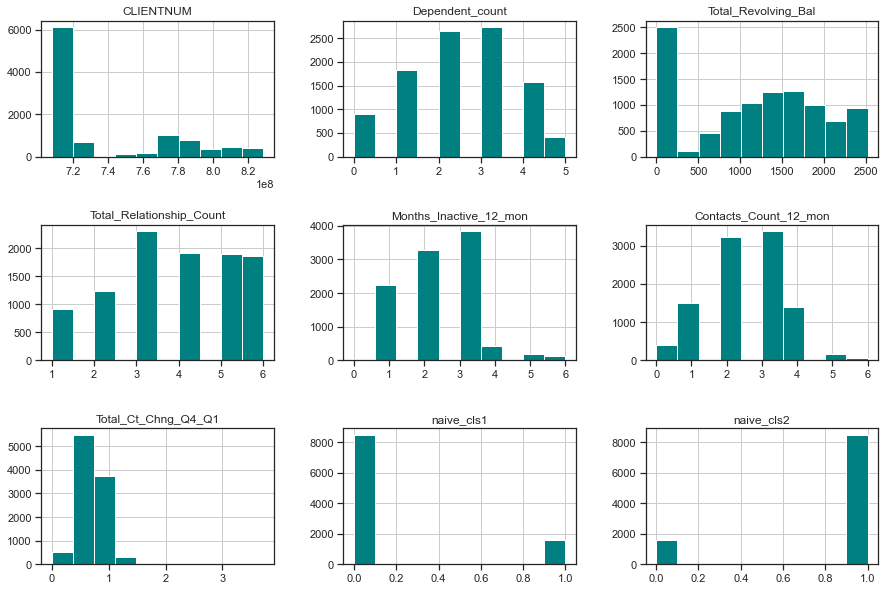

In [53]:
list_col=  ["CLIENTNUM","Dependent_count", "Total_Revolving_Bal","Total_Relationship_Count","Months_Inactive_12_mon", 
            "Contacts_Count_12_mon", "Total_Ct_Chng_Q4_Q1","naive_cls1","naive_cls2"]
ccattr_data[list_col].hist(figsize=(15, 10),color = "teal")
plt.subplots_adjust(hspace=0.5);

Features have possible cause for concern about and why?
* naive_cls1- because values are clustered down the low end.
* naive_cls1- because values are clustered down the high end.

##  Target Feature<a id='Target_Feature'></a>

How the" Attrition_Flag" relate to the 'Exit' status.

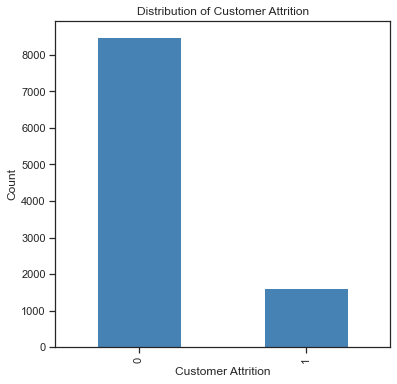

In [54]:
#How attrition flag distribution looks like.
ccattr_data["Attrition_Numeric"].value_counts().plot.bar(figsize=(6,6),color="steelblue")
plt.xlabel('Customer Attrition')
plt.ylabel('Count')
plt.title('Distribution of Customer Attrition');

Less than 2000 customer against 10000 customer data are churned. Same can be seen on pie chart as well with about 16% of the customers have churned. Given this is a small number, we need to ensure that the chosen model does predict with great accuracy.

##  Save Data<a id='Save_Data'></a>

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [55]:
ccattr_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'naive_cls1', 'naive_cls2', 'Attrition_Numeric',
       'Months_Inactive_12_mon_zScore', 'Total_Trans_Ct_zScore',
       'Customer_Age_zScore', 'Total_Trans_Amt_zScore',
       'Months_on_book_zScore', 'Contacts_Count_12_mon_zScore',
       'Credit_Limit_divMedian', 'Total_Amt_Chng_Q4_Q1_divMedian',
       'Total_Ct_Chng_Q4_Q1_divMedian', 'Total_Trans_Amt_divMedian',
       'Avg_Utilization_Ratio_divMedian', 'Total_Revolving_Bal_divMedian',
       'Avg_Open_To_Buy_divMedian', 'Credit_Limit_log', 'Avg_Open_To_Buy_log'],
      

In [56]:
# save the data to a new csv file
datapath = '../data'

datapath_ccattr_step2 = os.path.join(datapath, 'ccattr_step2_data_cleaned.csv')
#if not os.path.exists(datapath_ccattr_step2):
ccattr_data.to_csv(datapath_ccattr_step2, index=False)
    

## Summary<a id='Summary'></a>

The dataset for this project is titled ‘ccattr_data’ and it is in Excel format and contains data types float64, int64, and object. The dataset has 10127 rows and 23 columns, with a total of 232,921 observations recorded. Changed the Attrition flag values, "Existing customer" to 0 and "Attrited Customer" to 1 and add to new column 'Attrition_Numeric'. Applied zscore scaling on to 6 columns,"Customer_Age","Months_on_book","Total_Trans_Amt","Total_Trans_Ct","Months_Inactive_12_mon","Contacts_Count_12_mon" and created all 3 new columns with "_zscore" prefix.Applied dividing median scaling for Credit_Limit","Total_Trans_Amt","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Amt","Total_Ct_Chng_Q4_Q1","Total_Amt_Chng_Q4_Q1","Avg_Utilization_Ratio". and created all new column with"_divMedian" prefix. 

All together 15 new columns are added, making 38 columns in total. These may be useful in knowing better insights like outliers on values of these columns in EDA.
No columns are dropped.Over all there is no missing values, however Education level and Marital status have unknown values. These unknown values are fixed with their "Mode". The targetalue is identified as "Attrition_Flag".

Finally with all intial data cleanup, the new CSV file is saved in data folder with the name "ccattr_step2_data_cleaned.csv".
